In [120]:
import torch
from torch import nn

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
df = pd.read_csv("giaitich1.csv")
df.head()

,Hours,Scores
0,2.0,4.1
1,4.6,6.7
2,2.5,4.7
3,8.0,8.2
4,3.0,5.0


In [123]:
X = torch.tensor(df["Hours"].values.astype("float32"))
y = torch.tensor(df["Scores"].values.astype("float32"))


In [124]:
X_train = X[:int(0.7 * len(X))]
X_test = X[int(0.7 * len(X)):]
y_train = y[:int(0.7 * len(y))]
y_test = y[int(0.7 * len(y)):]

print(len(X_test), len(X_train))

8 16


<function matplotlib.pyplot.show(close=None, block=None)>

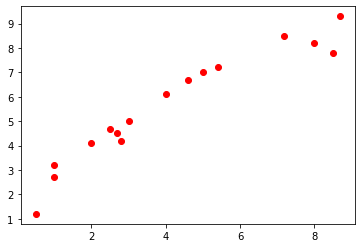

In [125]:
plt.plot(X_train, y_train, "ro")
plt.show

In [126]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1 , requires_grad=True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1 , requires_grad=True, dtype = torch.float))
    def forward(self, x):
        return self.weight * x + self.bias

In [127]:
torch.manual_seed(42)
model = LinearRegressionModel()


list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

<function matplotlib.pyplot.show(close=None, block=None)>

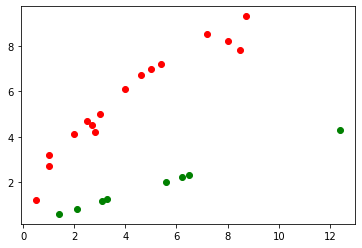

In [128]:
with torch.inference_mode():
    y_pred = model(X_test)

plt.plot(X_train, y_train, "ro")
plt.plot(X_test, y_pred, "go")
plt.show


In [129]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.001)

Epoch: 0 | MAE Train Loss: 4.113403797149658 | MAE Test Loss: 4.352766990661621 
Epoch: 10 | MAE Train Loss: 3.9285759925842285 | MAE Test Loss: 4.1305694580078125 
Epoch: 20 | MAE Train Loss: 3.743748188018799 | MAE Test Loss: 3.9083714485168457 
Epoch: 30 | MAE Train Loss: 3.55892014503479 | MAE Test Loss: 3.686173915863037 
Epoch: 40 | MAE Train Loss: 3.3740923404693604 | MAE Test Loss: 3.4639761447906494 
Epoch: 50 | MAE Train Loss: 3.189263105392456 | MAE Test Loss: 3.241776704788208 
Epoch: 60 | MAE Train Loss: 3.004434108734131 | MAE Test Loss: 3.0195775032043457 
Epoch: 70 | MAE Train Loss: 2.8196043968200684 | MAE Test Loss: 2.7973783016204834 
Epoch: 80 | MAE Train Loss: 2.634775400161743 | MAE Test Loss: 2.575179100036621 
Epoch: 90 | MAE Train Loss: 2.4499459266662598 | MAE Test Loss: 2.352980136871338 
Epoch: 100 | MAE Train Loss: 2.2651169300079346 | MAE Test Loss: 2.166123628616333 
Epoch: 110 | MAE Train Loss: 2.0802879333496094 | MAE Test Loss: 2.0760436058044434 
Epoc

<function matplotlib.pyplot.show(close=None, block=None)>

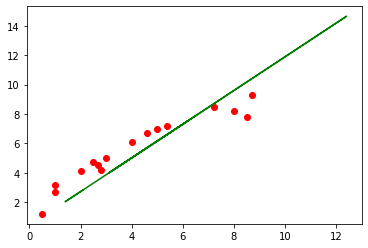

In [130]:
torch.manual_seed(42)
epochs = 400
train_loss_values = []
test_loss_values = []
epoch_count = []
for i in range (epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    # print(f'The {i} loop has{model.weight.grad} with  weight is {model.weight}3')
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
      # 1. Forward pass on test data
        test_pred = model(X_test)

      # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
        if i % 10 == 0:
            epoch_count.append(i)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {i} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
print()
print(model.weight, model.bias)
with torch.inference_mode():
    y_pred = model(X_test)
plt.plot(X_train, y_train, "ro")
plt.plot(X_test, y_pred, "g")
plt.show

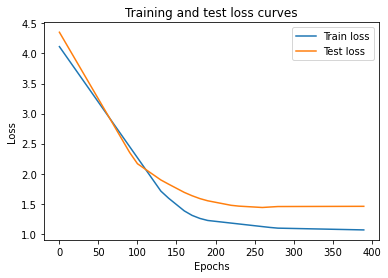

In [131]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

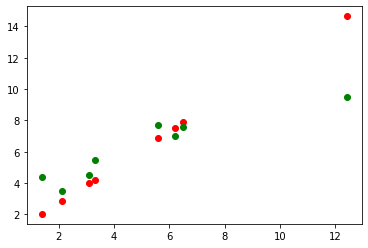

In [133]:
plt.plot(X_test, y_pred, "ro")
plt.plot(X_test, y_test, "go")
plt.show()

In [136]:
from pathlib import Path
MODEL_PATH = Path("LinearRegressionModel")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

MODEL_NAME = "pytorch_LinearRegression_model"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: LinearRegressionModel\pytorch_LinearRegression_model


In [137]:
load_model = LinearRegressionModel()
load_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [139]:
load_model.state_dict()

OrderedDict([('weight', tensor([1.1469])), ('bias', tensor([0.4239]))])